# 2 Data wrangling

## 2.1 Imports

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [2]:
from ipywidgets import FileUpload
from IPython.display import display
import io
from PIL import Image

## 2.2 Load The 'Olist' E-Commerce Dataset

In [3]:
order_items = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_order_items_dataset.csv')
orders = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_orders_dataset.csv')
payments = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_order_payments_dataset.csv')
products = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_products_dataset.csv')
sellers = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_sellers_dataset.csv')
customers = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_customers_dataset.csv')
geolocation = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_geolocation_dataset.csv')
reviews = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_order_reviews_dataset.csv')
translation = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\product_category_name_translation.csv')

## 2.3 Join the Data

The primary dataset that we'll use is the "olist_orders_dataset," and the three databases are connected to it directly using the order_id. Additionally, the "olist_customer_dataset" is linked to the order dataset by using customer_id as the key. Let's examine the columns in each dataset and determine if we need them for this project.

In [4]:
uploader = FileUpload(accept=r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\db_relationship.JPG', multiple=False)
display(uploader)

FileUpload(value={}, accept='C:\\Users\\JIYOON JUNG\\Desktop\\Springboard\\Unit 15 Data Wrangling\\Capstone2\\…

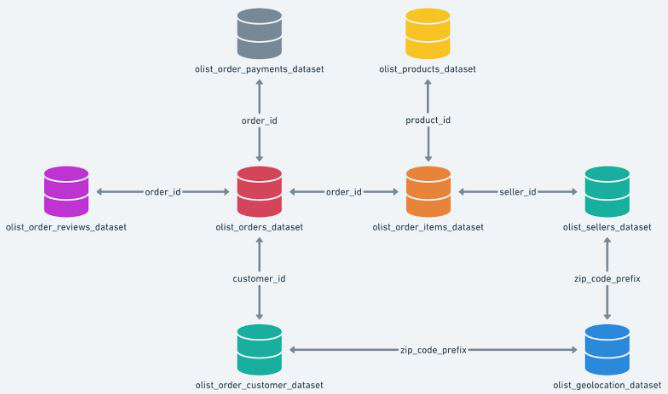

In [6]:
file_name = list(uploader.value.keys())[0]
image_binary_info = uploader.value[file_name]['content']
img_up = Image.open(io.BytesIO(image_binary_info))
img_up

In [7]:
# Merge the olist_orders_dataset with the olist_order_payments_dataset by using order_id
orders = pd.merge(orders, payments, how='left', on='order_id')

# Merge the olist_orders_dataset with the olist_order_reviews_dataset by using order_id
orders = pd.merge(orders, reviews, how='left', on='order_id')

# Merge the olist_orders_dataset with the olist_order_items_dataset by using order_id
orders = pd.merge(orders, order_items, how='left', on='order_id')

# Merge the olist_orders_dataset with the olist_order_customer_dataset by using customer_id
orders = pd.merge(orders, customers, how='left', on='customer_id')

# Merge the olist_orders_dataset with the olist_order_customer_dataset by using product_id
orders = pd.merge(orders, products, how='left', on='product_id')

# Merge the olist_orders_dataset with the olist_sellers_dataset by using seller_id
orders = pd.merge(orders, sellers, how='left', on='seller_id')

The geolocation dataset contains latitude, longitude, city, and state information corresponding to each zip code. After conducting the correlation analysis to present the geolocational representation of order data, we will merge this table with the order data. 

In [8]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


## 2.4 Explore the Data

### 2.4.1 Basic Information

In [9]:
orders.shape

(119143, 39)

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   payment_sequential             119140 non-null  float64
 9   payment_type                   119140 non-null  object 
 10  payment_installments           119140 non-null  float64
 11  payment_value                  119140 non-null  float64
 12  review_id                     

### 2.4.2 Change the datatype

In [11]:
pd.Series(orders.dtypes.values, index=orders.columns)

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
review_id                         object
review_score                     float64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
customer_unique_

In [12]:
# Change the datatype to datetime64
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [13]:
orders['order_purchase_timestamp'].dtypes.name

'datetime64[ns]'

In [14]:
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['review_creation_date'] = pd.to_datetime(orders['review_creation_date'])
orders['review_answer_timestamp'] = pd.to_datetime(orders['review_answer_timestamp'])
orders['shipping_limit_date'] = pd.to_datetime(orders['shipping_limit_date'])

In [15]:
pd.Series(orders.dtypes.values, index=orders.columns)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_id                                object
review_score                            float64
review_comment_title                     object
review_comment_message                   object
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
order_item_id                           float64
product_id                               object
seller_id                               

### 2.4.3 Missing data

In [16]:
missing = pd.concat([orders.isnull().sum(), 100 * orders.isnull().mean()], axis=1)
missing.columns=['count', '%']
print(missing.sort_values('%',ascending=False))

                                count          %
review_comment_title           105154  88.258647
review_comment_message          68898  57.827988
order_delivered_customer_date    3421   2.871339
product_photos_qty               2542   2.133571
product_category_name            2542   2.133571
product_name_lenght              2542   2.133571
product_description_lenght       2542   2.133571
order_delivered_carrier_date     2086   1.750837
review_creation_date              997   0.836810
review_answer_timestamp           997   0.836810
review_id                         997   0.836810
review_score                      997   0.836810
product_width_cm                  853   0.715946
product_height_cm                 853   0.715946
product_length_cm                 853   0.715946
product_weight_g                  853   0.715946
product_id                        833   0.699160
price                             833   0.699160
seller_zip_code_prefix            833   0.699160
seller_city         

##### review_comment_title and reveiw_comment_message

* 105154 review_comment_title, 68898 review_comment_message values missing

In [17]:
# Explore the 'review_comment_title' and 'reveiw_comment_message' columns.

review_comment_eg = orders[(orders['review_comment_title'].notnull()) & (orders['review_comment_message'].notnull())]
selected_columns = review_comment_eg[['review_score','review_comment_title', 'review_comment_message']]
selected_columns.head()

,review_score,review_comment_title,review_comment_message
3,4.0,Muito boa a loja,Muito bom o produto.
19,5.0,Nota dez,Obrigado pela atenção. Lojas lannister perfeit...
30,5.0,Ótimo,Sempre vou comprar aqui pois é a melhor parabéns
32,1.0,NÃO RECOMENDO!!!!,Até o momento não recebi o produto Protetor De...
33,1.0,NÃO RECOMENDO!!!!,Até o momento não recebi o produto Protetor De...


In [18]:
orders = orders.drop(['review_comment_title', 'review_comment_message'], axis=1)

###### product_id,  price, seller_zip_code_prefix, seller_city, freight_value, seller_state, shipping_limit_date, order_item_id, seller_id

* 533 values are missing in each column

In [19]:
orders[orders['product_id'].isnull() == True]['order_status'].value_counts()

unavailable    645
canceled       180
created          5
invoiced         2
shipped          1
Name: order_status, dtype: int64

###### product_photos_qty, product_category_name, product_name_lenght, product_description_lenght

*  2542 values are missing in each column

In [20]:
orders[orders['product_category_name'].isnull() == True]['order_status'].value_counts()

delivered      1638
unavailable     645
canceled        195
shipped          31
invoiced         14
processing       14
created           5
Name: order_status, dtype: int64

In [21]:
orders[(orders['product_category_name'].isnull()) & (~orders['order_status'].isin(['unavailable', 'canceled']))]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,1.0,credit_card,...,NaN,NaN,NaN,600.0,35.0,35.0,15.0,5455.0,sao paulo,SP
129,bfe42c22ecbf90bc9f35cf591270b6a7,803ac05904124294f8767894d6da532b,delivered,2018-01-27 22:04:34,2018-01-27 22:16:18,2018-02-03 03:56:00,2018-02-09 20:16:40,2018-02-26,1.0,credit_card,...,NaN,NaN,NaN,200.0,16.0,2.0,11.0,13483.0,limeira,SP
221,58ac1947c1a9067b9f416cba6d844a3f,ee8e1d37f563ecc11cc4dcb4dfd794c2,delivered,2017-09-13 09:18:50,2017-09-13 13:45:43,2017-09-14 21:20:03,2017-09-21 21:16:17,2017-09-25,1.0,credit_card,...,NaN,NaN,NaN,10800.0,40.0,40.0,30.0,11075.0,santos,SP
274,e22b71f6e4a481445ec4527cb4c405f7,1faf89c8f142db3fca6cf314c51a37b6,delivered,2017-04-22 13:48:18,2017-04-22 14:01:13,2017-04-24 19:08:53,2017-05-02 15:45:27,2017-05-11,1.0,credit_card,...,NaN,NaN,NaN,550.0,16.0,11.0,19.0,31255.0,belo horizonte,MG
316,a094215e786240fcfefb83d18036a1cd,86acfb656743da0c113d176832c9d535,delivered,2018-02-08 18:56:45,2018-02-08 19:32:18,2018-02-09 21:41:54,2018-02-19 13:28:50,2018-02-22,1.0,credit_card,...,NaN,NaN,NaN,400.0,20.0,12.0,15.0,7133.0,guarulhos,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118694,1a10e938a1c7d8e5eecc3380f71ca76b,8a81607347c25d881d995d94de6ad824,delivered,2018-07-25 08:58:35,2018-07-26 03:10:20,2018-07-27 11:32:00,2018-08-01 19:28:20,2018-08-10,1.0,boleto,...,NaN,NaN,NaN,450.0,16.0,7.0,11.0,7133.0,guarulhos,SP
118873,e33865519137f5737444109ae8438633,64b086bdcc54458af3ea3bd838db54a5,delivered,2018-05-28 00:44:06,2018-05-29 03:31:17,2018-05-30 13:13:00,2018-06-01 22:25:39,2018-06-20,1.0,boleto,...,NaN,NaN,NaN,600.0,32.0,15.0,28.0,2407.0,sao paulo,SP
118880,f0dd9af88d8ef5a8e4670fbbedaf19c4,30ddb50bd22ee927ebe308ea3da60735,delivered,2017-09-02 20:38:29,2017-09-05 04:24:12,2017-09-14 23:13:41,2017-09-15 14:59:50,2017-09-19,1.0,boleto,...,NaN,NaN,NaN,10750.0,34.0,20.0,30.0,3471.0,sao paulo,SP
118886,272874573723eec18f23c0471927d778,48e080c8001e92ebea2b64e474f91a60,delivered,2017-12-20 23:10:33,2017-12-20 23:29:37,2017-12-21 21:49:35,2017-12-26 22:29:32,2018-01-09,1.0,credit_card,...,NaN,NaN,NaN,400.0,20.0,12.0,15.0,7133.0,guarulhos,SP


### 2.4.4 Order status (chronological orders)

① created 
→
② invoiced 
→
③ approved
→
④ processing
→
⑤-a.shipped
⑤-b.unavailable
→
⑥ delivered

* Cancellation takes place in any stage. 

In [22]:
# Check the number of rows with each unique value of variable
df = orders['order_status'].value_counts().to_frame('counts').sort_values('counts', ascending = False).join(
    orders['order_status'].value_counts(dropna=False, normalize=True).to_frame('%'))
df

,counts,%
delivered,115723,0.971295
shipped,1256,0.010542
canceled,750,0.006295
unavailable,652,0.005472
invoiced,378,0.003173
processing,376,0.003156
created,5,0.000042
approved,3,0.000025


In [23]:
# Check at which stage of order the 'invoiced' takes place.
orders[orders['order_status'] == 'invoiced'][['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']].isnull().sum()

order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     378
order_delivered_customer_date    378
dtype: int64

In [24]:
# Check at which stage of order the 'processing' takes place.
orders[orders['order_status'] == 'processing'][['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']].isnull().sum()

order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     376
order_delivered_customer_date    376
dtype: int64

In [25]:
# Count the non-NA values of 'order_approved_at','order_delivered_carrier_date' ,'order_delivered_customer_date,' and 'order_delivered_customer_date' to see at which stage of order the cancellation takes places.
cancel_acc = orders[(orders['order_status'] == "canceled")][['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']].isnull().sum()
cancel_acc

order_purchase_timestamp           0
order_approved_at                157
order_delivered_carrier_date     670
order_delivered_customer_date    743
dtype: int64

In [26]:
before_approval= cancel_acc['order_approved_at']
before_carrier_pickup = cancel_acc['order_delivered_carrier_date'] - cancel_acc['order_approved_at']
before_customer_delivery = cancel_acc['order_delivered_customer_date'] - cancel_acc['order_delivered_carrier_date']
after_customer_delivery = len(orders[(orders['order_status'] == "canceled")&(orders['order_delivered_customer_date'].notnull())])

In [27]:
df = pd.Series({'before_approval': before_approval
    ,'before_carrier_pickup' : before_carrier_pickup
    ,'before_customer_delivery' : before_customer_delivery
    ,'after_customer_delivery' : after_customer_delivery})
df

before_approval             157
before_carrier_pickup       513
before_customer_delivery     73
after_customer_delivery       7
dtype: int64

### 2.4.5 Categorial Features

In [28]:
df = pd.Series(orders.select_dtypes('object').columns.T)
df

0                  order_id
1               customer_id
2              order_status
3              payment_type
4                 review_id
5                product_id
6                 seller_id
7        customer_unique_id
8             customer_city
9            customer_state
10    product_category_name
11              seller_city
12             seller_state
dtype: object

#### 2.4.5.1 order_Id

In [29]:
orders['order_id'].value_counts()

895ab968e7bb0d5659d16cd74cd1650c    63
fedcd9f7ccdc8cba3a18defedd1a5547    38
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
c6492b842ac190db807c15aff21a7dd6    24
                                    ..
3cd800ca7c2571661a5d8f0fe9053536     1
f98dc0bb1b5d1102af20837256cca2c5     1
63e2061a4407562cd451960ffcddf631     1
3e6e1b157030813612778573761473cd     1
66dea50a8b16d9b4dee7af250b4be1a5     1
Name: order_id, Length: 99441, dtype: int64

In [30]:
(orders['order_id']+','+orders['product_id']).value_counts().head()

895ab968e7bb0d5659d16cd74cd1650c,ebf9bc6cd600eadd681384e3116fda85    42
fedcd9f7ccdc8cba3a18defedd1a5547,0554911df28fda9fd668ce5ba5949695    38
fa65dad1b0e818e3ccc5cb0e39231352,1aecdb5fa3add74e385f25c6c527a462    29
ccf804e764ed5650cd8759557269dc13,8d37ee446981d3790967d0268d6cfc81    26
465c2e1bee4561cb39e0db8c5993aafc,11250b0d4b709fee92441c5f34122aed    24
dtype: int64

In [31]:
orders[(orders['order_id'] == '895ab968e7bb0d5659d16cd74cd1650c') & (orders['product_id'] == 'ebf9bc6cd600eadd681384e3116fda85')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
85508,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,17.0,voucher,...,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ
85509,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,17.0,voucher,...,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ
85511,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,1.0,voucher,...,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ
85512,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,1.0,voucher,...,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ
85514,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,13.0,voucher,...,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ
85515,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,13.0,voucher,...,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ
85517,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,16.0,voucher,...,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ
85518,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,16.0,voucher,...,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ
85520,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,19.0,voucher,...,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ
85521,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,19.0,voucher,...,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ


In [32]:
orders[(orders['order_id'] == '895ab968e7bb0d5659d16cd74cd1650c') & (orders['product_id'] == 'ebf9bc6cd600eadd681384e3116fda85')].sort_values('payment_sequential').T

,85511,85512,85530,85529,85545,85544,85523,85524,85548,85547,...,85508,85509,85536,85535,85520,85521,85559,85560,85527,85526
order_id,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,...,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c
customer_id,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,...,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83
order_status,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,...,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,...,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31
order_approved_at,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,...,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31
order_delivered_carrier_date,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,...,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14
order_delivered_customer_date,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,...,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18
order_estimated_delivery_date,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,...,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00
payment_sequential,1.0,1.0,2.0,2.0,3.0,3.0,4.0,4.0,5.0,5.0,...,17.0,17.0,18.0,18.0,19.0,19.0,20.0,20.0,21.0,21.0
payment_type,voucher,voucher,voucher,voucher

In [33]:
# Drop columns from 'payments' dataset. 
orders = orders.drop(['payment_sequential', 'payment_type', 'payment_installments', 'payment_value'], axis=1).drop_duplicates()

In [34]:
(orders['order_id']+','+orders['product_id']).value_counts().head()

ab14fdcfbe524636d65ee38360e22ce8,9571759451b1d780ee7c15012ea109d4    20
1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3    20
9ef13efd6949e4573a18964dd1bbe7f5,37eb69aca8718e843d897aa7b82f462d    15
428a2f660dc84138d969ccd69a0ab6d5,89b190a046022486c635022524a974a8    15
9bdc4d4c71aa1de4606060929dee888c,44a5d24dd383324a421569ca697b13c2    14
dtype: int64

In [35]:
orders[orders['order_id'] == 'ab14fdcfbe524636d65ee38360e22ce8'].T

,112579,112580,112581,112582,112583,112584,112585,112586,112587,112588,112589,112590,112591,112592,112593,112594,112595,112596,112597,112598
order_id,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8
customer_id,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be
order_status,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34
order_approved_at,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23
order_delivered_carrier_date,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36
order_delivered_customer_date,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03
order_estimated_delivery_date,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00
review_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [36]:
len(orders)

114092

In [37]:
orders.drop_duplicates()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4.0,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5.0,...,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5.0,...,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,29bb71b2760d0f876dfa178a76bc4734,4.0,...,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,17602.0,tupa,SP
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,371579771219f6db2d830d50805977bb,5.0,...,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,8290.0,sao paulo,SP
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,8ab6855b9fe9b812cd03a480a25058a1,2.0,...,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,37175.0,ilicinea,MG
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,8ab6855b9fe9b812cd03a480a25058a1,2.0,...,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,37175.0,ilicinea,MG


In [38]:
# Counting the occurrences of each order ID
order_counts = orders['order_id'].value_counts()

# Counting occurrences of unit counts
unit_counts = order_counts.value_counts().to_frame('counts') 

# Calculating the percentage of each unit count
unit_percentage = order_counts.value_counts(normalize=True).to_frame('%')  
order_size = unit_counts.join(unit_percentage).sort_index(ascending=True).reset_index()
order_size

,index,counts,%
0,1,89166,0.896672
1,2,7929,0.079736
2,3,1315,0.013224
3,4,555,0.005581
4,5,204,0.002051
5,6,205,0.002062
6,7,22,0.000221
7,8,14,0.000141
8,9,4,0.000040
9,10,8,0.000080


In [39]:
weighted_mean = (order_size['index'] * order_size['counts']).sum() / order_size['counts'].sum()
print("Average_order_size:", round(weighted_mean,2))

Average_order_size: 1.15


In [40]:
orders['Year'] = orders['order_purchase_timestamp'].dt.year
orders['Month'] = orders['order_purchase_timestamp'].dt.month

In [41]:
order_counts_2 = pd.DataFrame(orders['order_id'].value_counts()).reset_index()
order_counts_2.columns = ['order_id', 'counts']

In [42]:
# Merging order_counts_2 with orders DataFrame on 'order_id' and dropping duplicates
order_counts_2 = pd.merge(order_counts_2, orders[['order_id', 'Year', 'Month']], how='inner', on='order_id').drop_duplicates()

# Displaying the first few rows of the merged DataFrame
order_counts_2.head()

,order_id,counts,Year,Month
0,5a3b1c29a49756e75f1ef513383c0c12,22,2017,10
22,8272b63d03f5f79c56e9e4120aec44ef,21,2017,7
43,ab14fdcfbe524636d65ee38360e22ce8,20,2017,8
63,1b15974a0141d54e36626dca3fdc731a,20,2018,2
83,428a2f660dc84138d969ccd69a0ab6d5,15,2017,11


In [43]:
# Counting the occurrences of each order ID
order_counts_2 = order_counts_2.groupby(['Year', 'Month', 'counts']).size().reset_index(name='occurrences')

In [44]:
# Calculate the weighted mean within each 'Year' and 'Month' group without using apply or lambda
weighted_mean = (order_counts_2['counts'] * order_counts_2['occurrences']).groupby([order_counts_2['Year'], order_counts_2['Month']]).sum() / order_counts_2['occurrences'].groupby([order_counts_2['Year'], order_counts_2['Month']]).sum()

# Round the calculated weighted mean to 2 decimal places
weighted_mean = pd.DataFrame(weighted_mean.round(2))
weighted_mean

0
Year Month      
2016 9      1.75
     10     1.18
     12     1.00
2017 1      1.22
     2      1.13
     3      1.14
     4      1.13
     5      1.14
     6      1.12
     7      1.15
     8      1.16
     9      1.15
     10     1.17
     11     1.17
     12     1.13
2018 1      1.14
     2      1.16
     3      1.15
     4      1.15
     5      1.16
     6      1.15
     7      1.13
     8      1.12
     9      1.00
     10     1.00

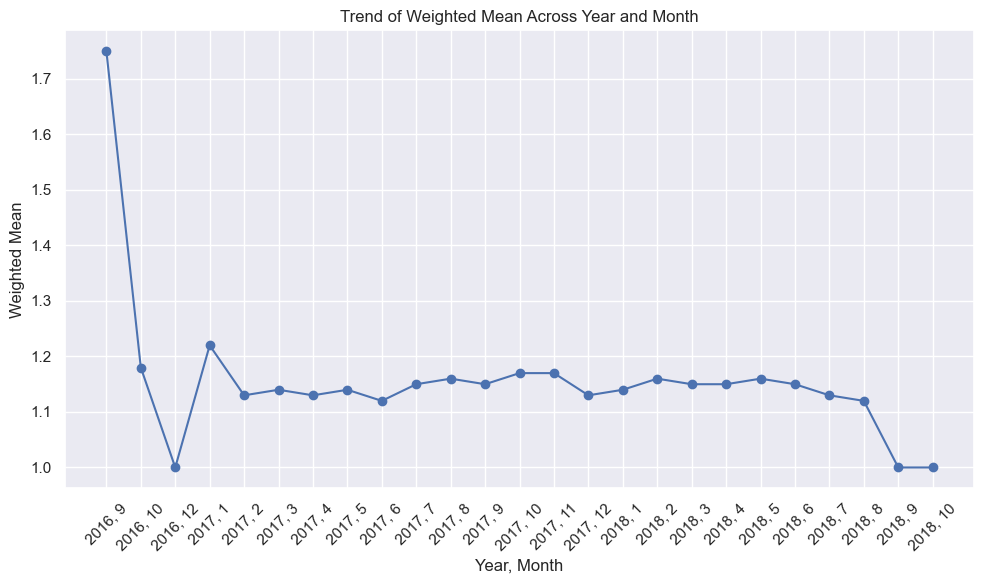

In [45]:
# Combine 'Year' and 'Month' into a single variable for x-axis
x_values = weighted_mean.index.get_level_values('Year').astype(str) + ', ' + weighted_mean.index.get_level_values('Month').astype(str)

# Plotting the trend of weighted mean values
plt.figure(figsize=(10, 6))
plt.plot(x_values, weighted_mean.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year, Month')
plt.ylabel('Weighted Mean')
plt.title('Trend of Weighted Mean Across Year and Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

###### Create 'order_item_qty' column and delete 'order_item_id' 

In [46]:
item_counts = pd.DataFrame(orders['order_id'].value_counts().reset_index().rename(columns = {'index':'order_id', 'order_id' : 'order_item_qty'}))

In [47]:
orders = pd.merge(orders, item_counts, how='left', on='order_id')

In [48]:
product_counts = orders.groupby(['order_id', 'product_id']).size().reset_index(name='product_qty').sort_values('product_qty')

In [49]:
orders = pd.merge(orders, product_counts, how='left', on=['order_id', 'product_id'])

In [50]:
pd.Series(orders.columns)

0                          order_id
1                       customer_id
2                      order_status
3          order_purchase_timestamp
4                 order_approved_at
5      order_delivered_carrier_date
6     order_delivered_customer_date
7     order_estimated_delivery_date
8                         review_id
9                      review_score
10             review_creation_date
11          review_answer_timestamp
12                    order_item_id
13                       product_id
14                        seller_id
15              shipping_limit_date
16                            price
17                    freight_value
18               customer_unique_id
19         customer_zip_code_prefix
20                    customer_city
21                   customer_state
22            product_category_name
23              product_name_lenght
24       product_description_lenght
25               product_photos_qty
26                 product_weight_g
27                product_le

In [51]:
orders = orders.drop(columns = 'order_item_id').drop_duplicates()

In [52]:
dup_check = orders.groupby(['order_id', 'product_id','product_qty', 'order_item_qty']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

In [53]:
orders[(orders['order_id'] == 'df56136b8031ecd28e200bb18e6ddb2e') &
      (orders['product_id'] == 'f28cbd414cd06f1ae84065c8dd8be834')
      ].T

,38032,38035,38038
order_id,df56136b8031ecd28e200bb18e6ddb2e,df56136b8031ecd28e200bb18e6ddb2e,df56136b8031ecd28e200bb18e6ddb2e
customer_id,b7770073b02ed1d626a027ce86a4ff82,b7770073b02ed1d626a027ce86a4ff82,b7770073b02ed1d626a027ce86a4ff82
order_status,delivered,delivered,delivered
order_purchase_timestamp,2017-01-26 13:15:41,2017-01-26 13:15:41,2017-01-26 13:15:41
order_approved_at,2017-01-27 03:05:27,2017-01-27 03:05:27,2017-01-27 03:05:27
order_delivered_carrier_date,2017-01-31 19:44:07,2017-01-31 19:44:07,2017-01-31 19:44:07
order_delivered_customer_date,2017-02-06 09:52:10,2017-02-06 09:52:10,2017-02-06 09:52:10
order_estimated_delivery_date,2017-03-23 00:00:00,2017-03-23 00:00:00,2017-03-23 00:00:00
review_id,c444278834184f72b1484dfe47de7f97,72a1098d5b410ae50fbc0509d26daeb9,44f3e54834d23c5570c1d010824d4d59
review_score,5.0,5.0,5.0


In [55]:
# Delete all columns related to reviews to remove duplicates.
orders = orders.drop(columns = ['review_id', 'review_score', 'review_score', 'review_creation_date', 'review_answer_timestamp']).drop_duplicates()

In [58]:
dup_check = orders.groupby(['order_id', 'product_id','product_qty', 'order_item_qty']).size().reset_index(name='counts').sort_values(by='order_item_qty', ascending=False)
dup_check

,order_id,product_id,product_qty,order_item_qty,counts
36026,5a3b1c29a49756e75f1ef513383c0c12,6a0713a63e990052795623e76cc2995e,2.0,22,1
36028,5a3b1c29a49756e75f1ef513383c0c12,d25bbb182b51d1594fe3b54a27ae143e,4.0,22,1
36027,5a3b1c29a49756e75f1ef513383c0c12,99444c1e11fc38755dae86f5c67d3d1a,4.0,22,1
36024,5a3b1c29a49756e75f1ef513383c0c12,17d8b8e9c21ec0fc5b33724e32fe422e,2.0,22,1
36029,5a3b1c29a49756e75f1ef513383c0c12,e95fb3a80ca294f39de925b6428f3a32,4.0,22,1
...,...,...,...,...,...
36692,5bff01e3dff7247fb0b9e27535303846,fe8f341b1e20d2b1135245c3400a6e53,1.0,1,1
36691,5bfd0cddafa5fbbaa95429ed5577be6c,67a0da468c31cff23c32dbfb6dcb6b70,1.0,1,1
36690,5bfce111a3fc0a622ab552626165ab2f,f25f304f0e7163a29c271960a6704b0f,1.0,1,1
36689,5bfb6e0571dfc12cf4710357871f00ba,3354a4e684f5e7199f9407db70ccd92b,1.0,1,1


In [59]:
orders[orders['order_id'] == '5a3b1c29a49756e75f1ef513383c0c12']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,Year,Month,order_item_qty,product_qty
19312,5a3b1c29a49756e75f1ef513383c0c12,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,2017-10-17 13:06:29,2017-10-18 13:06:21,2017-10-20 19:09:07,2017-10-22 14:43:54,2017-11-03,99444c1e11fc38755dae86f5c67d3d1a,d2374cbcbb3ca4ab1086534108cc3ab7,...,33.0,9.0,38.0,14940.0,ibitinga,SP,2017,10,22,4.0
19313,5a3b1c29a49756e75f1ef513383c0c12,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,2017-10-17 13:06:29,2017-10-18 13:06:21,2017-10-20 19:09:07,2017-10-22 14:43:54,2017-11-03,17d8b8e9c21ec0fc5b33724e32fe422e,d2374cbcbb3ca4ab1086534108cc3ab7,...,30.0,4.0,40.0,14940.0,ibitinga,SP,2017,10,22,2.0
19314,5a3b1c29a49756e75f1ef513383c0c12,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,2017-10-17 13:06:29,2017-10-18 13:06:21,2017-10-20 19:09:07,2017-10-22 14:43:54,2017-11-03,399f54c06661d06ca45c6e24ed238e0e,d2374cbcbb3ca4ab1086534108cc3ab7,...,33.0,9.0,38.0,14940.0,ibitinga,SP,2017,10,22,6.0
19315,5a3b1c29a49756e75f1ef513383c0c12,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,2017-10-17 13:06:29,2017-10-18 13:06:21,2017-10-20 19:09:07,2017-10-22 14:43:54,2017-11-03,6a0713a63e990052795623e76cc2995e,d2374cbcbb3ca4ab1086534108cc3ab7,...,40.0,4.0,30.0,14940.0,ibitinga,SP,2017,10,22,2.0
19318,5a3b1c29a49756e75f1ef513383c0c12,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,2017-10-17 13:06:29,2017-10-18 13:06:21,2017-10-20 19:09:07,2017-10-22 14:43:54,2017-11-03,d25bbb182b51d1594fe3b54a27ae143e,cfb1a033743668a192316f3c6d1d2671,...,58.0,15.0,46.0,18110.0,votorantim,SP,2017,10,22,4.0
19319,5a3b1c29a49756e75f1ef513383c0c12,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,2017-10-17 13:06:29,2017-10-18 13:06:21,2017-10-20 19:09:07,2017-10-22 14:43:54,2017-11-03,e95fb3a80ca294f39de925b6428f3a32,d2374cbcbb3ca4ab1086534108cc3ab7,...,33.0,9.0,38.0,14940.0,ibitinga,SP,2017,10,22,4.0


#### 2.4.5.2 product_id & product_category_name

In [93]:
product_sales_by_month =orders.groupby(['Year', 'Month','product_category_name'])['product_qty'].sum().groupby(['Year', 'Month', 'product_category_name']).sum().reset_index(name = 'sales')

product_sales_by_month['total_sales'] = product_sales_by_month.groupby(['Year', 'Month'])['sales'].transform('sum')
product_sales_by_month['sales_percentage'] = round((product_sales_by_month['sales'] / product_sales_by_month['total_sales']) * 100, 2)

TopProduct17 = product_sales_by_month[product_sales_by_month['Year'] == 2017]
TopProduct17

,Year,Month,product_category_name,sales,total_sales,sales_percentage
35,2017,1,agro_industria_e_comercio,3.0,953.0,0.31
36,2017,1,alimentos,2.0,953.0,0.21
37,2017,1,automotivo,34.0,953.0,3.57
38,2017,1,bebes,41.0,953.0,4.30
39,2017,1,beleza_saude,85.0,953.0,8.92
...,...,...,...,...,...,...
733,2017,12,sinalizacao_e_seguranca,2.0,6187.0,0.03
734,2017,12,tablets_impressao_imagem,6.0,6187.0,0.10
735,2017,12,telefonia,267.0,6187.0,4.32
736,2017,12,telefonia_fixa,5.0,6187.0,0.08


In [92]:
orders[(orders['Year'] == 2017) & 
       (orders['Month'] == 1) &
       (orders['product_category_name'] =='agro_industria_e_comercio')]['product_qty'].sum()

3.0

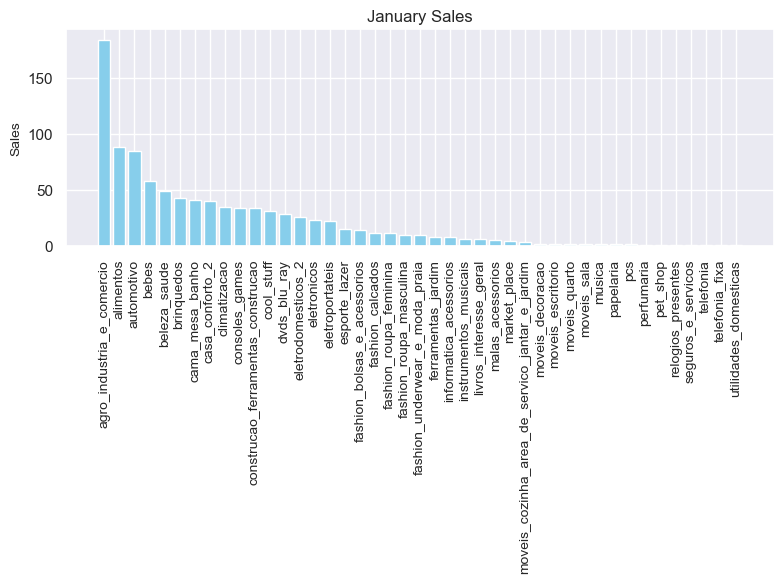

In [122]:
Jan = TopProduct17[TopProduct17['Month'] == 1]
categories = Jan['product_category_name'].unique()
values = sorted(Jan['sales'], reverse = True)

# Creating the bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color='skyblue')
plt.ylabel('Sales', fontsize=10)
plt.title('January Sales')
plt.xticks(rotation=90, fontsize=10) 
plt.tight_layout()
plt.show()

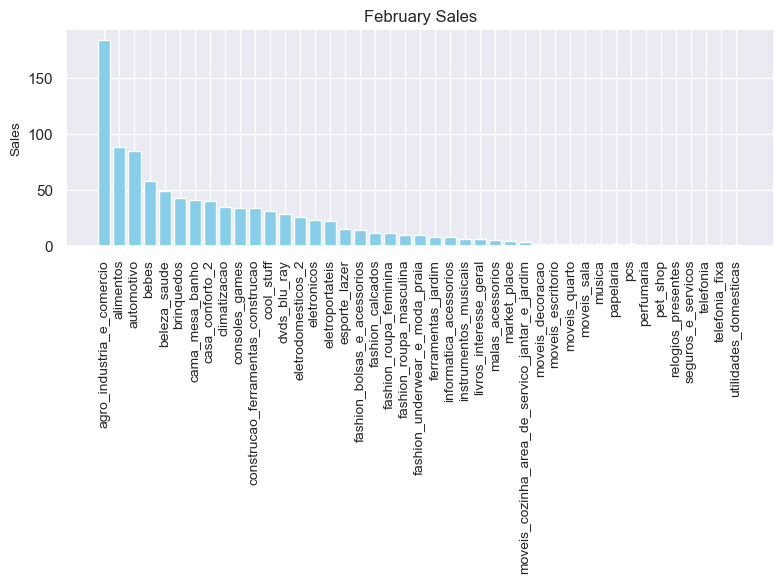

In [127]:
Feb = TopProduct17[TopProduct17['Month'] == 2]
categories = Jan['product_category_name'].unique()
values = sorted(Jan['sales'], reverse = True)

# Creating the bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color='skyblue')
plt.ylabel('Sales', fontsize=10)
plt.title('February Sales')
plt.xticks(rotation=90, fontsize=10) 
plt.tight_layout()
plt.show()

### 2.6 Numeric Data Features

In [129]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
price,102425.0,124.422006,188.926084,0.85,40.00,78.80,139.00,6735.00
freight_value,102425.0,20.111152,15.884700,0.00,13.14,16.32,21.22,409.68
customer_zip_code_prefix,103200.0,35083.653207,29792.249469,1003.00,11320.00,24358.00,58736.25,99990.00
product_name_lenght,100965.0,48.874868,9.997415,5.00,43.00,52.00,57.00,76.00
product_description_lenght,100965.0,787.263804,650.586810,4.00,348.00,603.00,987.00,3992.00
product_photos_qty,100965.0,2.239915,1.743415,1.00,1.00,2.00,3.00,20.00
product_weight_g,102409.0,2090.916472,3750.962163,0.00,300.00,700.00,1800.00,40425.00
product_length_cm,102409.0,30.085285,16.097482,7.00,18.00,25.00,38.00,105.00
product_height_cm,102409.0,16.409222,13.310745,2.00,8.00,13.00,20.00,105.00
product_width_cm,102409.0,23.039528,11.747033,6.00,15.00,20.00,30.00,118.00


In [145]:
sales = orders[['order_id', 'price', 'Year', 'Month']]
monthly_sales = pd.DataFrame(sales['price'].groupby([sales['Year'], sales['Month']]).sum()).reset_index()
monthly_sales.columns = ['Year', 'Month', 'Sales']
monthly_sales

,Year,Month,Sales
0,2016,9,177.38
1,2016,10,46276.02
2,2016,12,10.90
3,2017,1,110657.87
4,2017,2,234656.84
5,2017,3,354293.67
6,2017,4,338466.85
7,2017,5,477419.01
8,2017,6,415667.84
9,2017,7,467503.68


### 2.7 Subsetting the Dataset

In [146]:
len(orders)

103200

In [147]:
orders17 = orders[orders['Year'] == 2017]

In [148]:
len(orders17)

46836